In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


In [2]:
comm_sale_report = pd.read_csv('Amazon Sale Report.csv')
comm_sale_report.sample(5)

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,promotion-ids,B2B,fulfilled-by,Unnamed: 22
2682,2682,407-9556485-5636368,04-29-22,Shipped,Amazon,Amazon.in,Expedited,JNE3160,JNE3160-KR-G-XXL,kurta,...,INR,685.0,PIMPRI CHINCHWAD,MAHARASHTRA,411026.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,True,NaN,NaN
26081,26081,407-9958065-0526749,04-15-22,Cancelled,Amazon,Amazon.in,Expedited,JNE1906,JNE1906-KR-031-XS,kurta,...,NaN,NaN,Sangareddy,TELANGANA,502314.0,IN,NaN,False,NaN,NaN
122738,122738,405-9155423-7509150,06-05-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,SET282,SET282-KR-PP-XXL,Set,...,INR,1043.0,HUZURABAD,TELANGANA,505468.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship,False
101373,101373,407-1939270-8553106,06-20-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3798,JNE3798-KR-XXXL,Western Dress,...,INR,725.0,BARWALA,Gujarat,382450.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship,False
71843,71843,403-9723481-0626732,05-13-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,SET145,SET145-KR-NP-M,Set,...,INR,788.0,HYDERABAD,TELANGANA,500067.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship,False


In [3]:
comm_sale_report.shape

(128975, 24)

In [4]:
comm_sale_report.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128975 entries, 0 to 128974
Data columns (total 24 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   index               128975 non-null  int64  
 1   Order ID            128975 non-null  object 
 2   Date                128975 non-null  object 
 3   Status              128975 non-null  object 
 4   Fulfilment          128975 non-null  object 
 5   Sales Channel       128975 non-null  object 
 6   ship-service-level  128975 non-null  object 
 7   Style               128975 non-null  object 
 8   SKU                 128975 non-null  object 
 9   Category            128975 non-null  object 
 10  Size                128975 non-null  object 
 11  ASIN                128975 non-null  object 
 12  Courier Status      122103 non-null  object 
 13  Qty                 128975 non-null  int64  
 14  currency            121180 non-null  object 
 15  Amount              121180 non-nul

In [5]:
comm_sale_report.duplicated().sum()

0

In [6]:
comm_sale_report.columns

Index(['index', 'Order ID', 'Date', 'Status', 'Fulfilment', 'Sales Channel ',
       'ship-service-level', 'Style', 'SKU', 'Category', 'Size', 'ASIN',
       'Courier Status', 'Qty', 'currency', 'Amount', 'ship-city',
       'ship-state', 'ship-postal-code', 'ship-country', 'promotion-ids',
       'B2B', 'fulfilled-by', 'Unnamed: 22'],
      dtype='object')

In [7]:
comm_sale_report = comm_sale_report.drop(columns= ['index','Status','Sales Channel ','currency','ship-country','fulfilled-by','Unnamed: 22'])

In [8]:
comm_sale_report.head()

,Order ID,Date,Fulfilment,ship-service-level,Style,SKU,Category,Size,ASIN,Courier Status,Qty,Amount,ship-city,ship-state,ship-postal-code,promotion-ids,B2B
0,405-8078784-5731545,04-30-22,Merchant,Standard,SET389,SET389-KR-NP-S,Set,S,B09KXVBD7Z,NaN,0,647.62,MUMBAI,MAHARASHTRA,400081.0,NaN,False
1,171-9198151-1101146,04-30-22,Merchant,Standard,JNE3781,JNE3781-KR-XXXL,kurta,3XL,B09K3WFS32,Shipped,1,406.00,BENGALURU,KARNATAKA,560085.0,Amazon PLCC Free-Financing Universal Merchant ...,False
2,404-0687676-7273146,04-30-22,Amazon,Expedited,JNE3371,JNE3371-KR-XL,kurta,XL,B07WV4JV4D,Shipped,1,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN Core Free Shipping 2015/04/08 23-48-5-108,True
3,403-9615377-8133951,04-30-22,Merchant,Standard,J0341,J0341-DR-L,Western Dress,L,B099NRCT7B,NaN,0,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,NaN,False
4,407-1069790-7240320,04-30-22,Amazon,Expedited,JNE3671,JNE3671-TU-XXXL,Top,3XL,B098714BZP,Shipped,1,574.00,CHENNAI,TAMIL NADU,600073.0,NaN,False


In [9]:
comm_sale_report['Courier Status'].value_counts()

Shipped      109487
Unshipped      6681
Cancelled      5935
Name: Courier Status, dtype: int64

Text(0.5, 1.0, 'Customer count by Status')

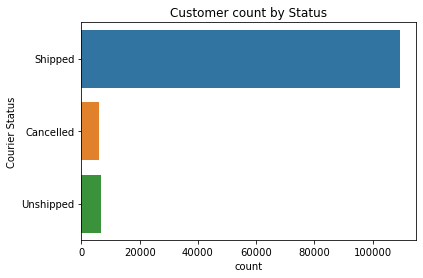

In [10]:
sns.countplot(y = 'Courier Status', data = comm_sale_report)
plt.title("Customer count by Status")

In [11]:
comm_sale_report['Fulfilment'].value_counts()

Amazon      89698
Merchant    39277
Name: Fulfilment, dtype: int64

<AxesSubplot:xlabel='count', ylabel='Fulfilment'>

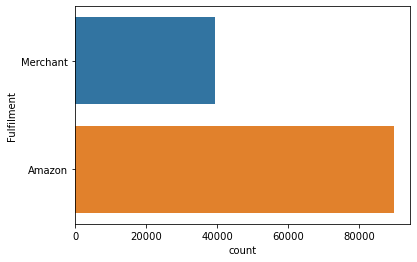

In [12]:
sns.countplot(y = 'Fulfilment', data = comm_sale_report)

In [13]:
comm_sale_report['ship-service-level'].value_counts()


Expedited    88615
Standard     40360
Name: ship-service-level, dtype: int64

<AxesSubplot:xlabel='count', ylabel='ship-service-level'>

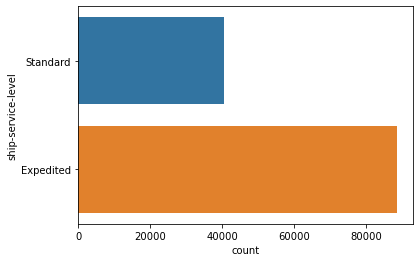

In [14]:
sns.countplot(y = 'ship-service-level', data = comm_sale_report)


<AxesSubplot:xlabel='Size', ylabel='Amount'>

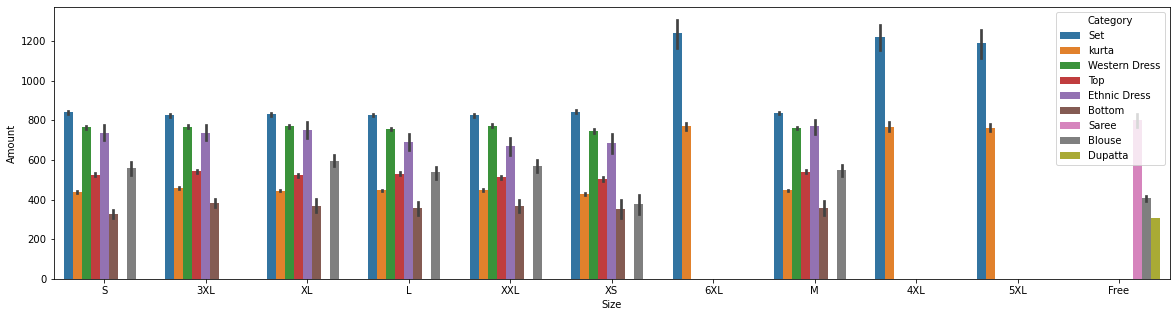

In [15]:
fig, ax = plt.subplots(figsize=(20,5))
sns.barplot(comm_sale_report['Size'],comm_sale_report['Amount'], hue=comm_sale_report['Category'])

In [16]:
comm_sale_report.isnull().sum()

Order ID                  0
Date                      0
Fulfilment                0
ship-service-level        0
Style                     0
SKU                       0
Category                  0
Size                      0
ASIN                      0
Courier Status         6872
Qty                       0
Amount                 7795
ship-city                33
ship-state               33
ship-postal-code         33
promotion-ids         49153
B2B                       0
dtype: int64

In [17]:
comm_sale_report['Courier Status'] = comm_sale_report['Courier Status'].fillna('Cancelled')

In [28]:
comm_sale_report.sample(5)

,Order ID,Date,Fulfilment,ship-service-level,Style,SKU,Category,Size,ASIN,Courier Status,Qty,Amount,ship-city,ship-state,ship-postal-code,promotion-ids,B2B
23512,171-2548815-8077933,04-16-22,Amazon,Expedited,J0369,J0369-SKD-XS,Set,XS,B09K43MP8R,Shipped,1,1099.0,MEERUT,UTTAR PRADESH,250001.0,IN Core Free Shipping 2015/04/08 23-48-5-108,False
87269,408-2834738-2347500,05-02-22,Amazon,Expedited,JNE3461,JNE3461-KR-M,kurta,M,B08B3VSTFG,Shipped,1,352.0,CHENNAI,TAMIL NADU,600116.0,IN Core Free Shipping 2015/04/08 23-48-5-108,False
106514,408-6222806-7158767,06-16-22,Amazon,Standard,SET402,SET402-KR-NP-XXL,Set,XXL,B09VC57SBH,Cancelled,0,NaN,DELHI,DELHI,110085.0,NaN,False
84868,402-0670901-0704305,05-04-22,Amazon,Expedited,J0340,J0340-TP-XS,Top,XS,B0987184SL,Shipped,1,563.0,MUMBAI,MAHARASHTRA,400004.0,IN Core Free Shipping 2015/04/08 23-48-5-108,False
100710,405-3833197-3959553,06-21-22,Amazon,Expedited,J0157,J0157-DR-L,Western Dress,L,B09831FVYR,Shipped,1,649.0,MUMBAI,MAHARASHTRA,400078.0,IN Core Free Shipping 2015/04/08 23-48-5-108,False


In [30]:
# it is observed that where there is courier status = cancelled and qty = 0, we can observe amount = NaN. 
# so we can replace amount with 0.
comm_sale_report['Amount'] = comm_sale_report['Amount'].fillna(0)

In [31]:
comm_sale_report.sample(5)

,Order ID,Date,Fulfilment,ship-service-level,Style,SKU,Category,Size,ASIN,Courier Status,Qty,Amount,ship-city,ship-state,ship-postal-code,promotion-ids,B2B
0,405-8078784-5731545,04-30-22,Merchant,Standard,SET389,SET389-KR-NP-S,Set,S,B09KXVBD7Z,Cancelled,0,647.62,MUMBAI,MAHARASHTRA,400081.0,NaN,False
1,171-9198151-1101146,04-30-22,Merchant,Standard,JNE3781,JNE3781-KR-XXXL,kurta,3XL,B09K3WFS32,Shipped,1,406.00,BENGALURU,KARNATAKA,560085.0,Amazon PLCC Free-Financing Universal Merchant ...,False
2,404-0687676-7273146,04-30-22,Amazon,Expedited,JNE3371,JNE3371-KR-XL,kurta,XL,B07WV4JV4D,Shipped,1,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN Core Free Shipping 2015/04/08 23-48-5-108,True
3,403-9615377-8133951,04-30-22,Merchant,Standard,J0341,J0341-DR-L,Western Dress,L,B099NRCT7B,Cancelled,0,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,NaN,False
4,407-1069790-7240320,04-30-22,Amazon,Expedited,JNE3671,JNE3671-TU-XXXL,Top,3XL,B098714BZP,Shipped,1,574.00,CHENNAI,TAMIL NADU,600073.0,NaN,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128970,406-6001380-7673107,05-31-22,Amazon,Expedited,JNE3697,JNE3697-KR-XL,kurta,XL,B098112V2V,Shipped,1,517.00,HYDERABAD,TELANGANA,500013.0,NaN,False
128971,402-9551604-7544318,05-31-22,Amazon,Expedited,SET401,SET401-KR-NP-M,Set,M,B09VC6KHX8,Shipped,1,999.00,GURUGRAM,HARYANA,122004.0,IN Core Free Shipping 2015/04/08 23-48-5-108,False
128972,407-9547469-3152358,05-31-22,Amazon,Expedited,J0157,J0157-DR-XXL,Western Dress,XXL,B0982YZ51B,Shipped,1,690.00,HYDERABAD,TELANGANA,500049.0,NaN,False
128973,402-6184140-0545956,05-31-22,Amazon,Expedited,J0012,J0012-SKD-XS,Set,XS,B0894Y2NJQ,Shipped,1,1199.00,Halol,Gujarat,389350.0,IN Core Free Shipping 2015/04/08 23-48-5-108,False
